In [1]:
# import sqlite3
# import pandas as pd
# import geopandas as gpd
# from shapely.geometry import Point
# from tqdm import tqdm

# # Provided function
# def get_borough(lon, lat, boroughs_gdf, boroughs_sindex):
#     point = Point(lon, lat)
#     possible_matches_index = list(boroughs_sindex.intersection(point.bounds))
#     possible_matches = boroughs_gdf.iloc[possible_matches_index]
#     for _, borough in possible_matches.iterrows():
#         if borough['geometry'].contains(point):
#             return borough['name']  # Assuming 'name' is the column with the borough names
#     return None

# # Load the GeoDataFrame for boroughs (assuming it's available as a shapefile or similar)
# boroughs_gdf = gpd.read_file('../data/London_Boroughs.gpkg')
# boroughs_gdf = boroughs_gdf.to_crs(epsg=4326)
# boroughs_sindex = boroughs_gdf.sindex

# # Define the best and worst boroughs
# best_boroughs = [
#     'Kingston upon Thames', 'Bexley', 'Sutton',
#     'Westminster', 'Kensington and Chelsea'
# ]
# worst_boroughs = [
#     'Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth'
# ]

# # Connect to the SQLite database
# conn = sqlite3.connect('data/crime_data.db')
# query = "SELECT * FROM 'metropolitan-stop-and-search'"
# df = pd.read_sql_query(query, conn)

# # Create a list to store the filtered rows
# filtered_rows = []

# # Iterate over the dataframe rows with a progress bar
# for _, row in tqdm(df.iterrows(), total=df.shape[0]):
#     lon = row['Longitude']
#     lat = row['Latitude']
#     borough = get_borough(lon, lat, boroughs_gdf, boroughs_sindex)
    
#     if borough in best_boroughs or borough in worst_boroughs:
#         row['Borough'] = borough
#         filtered_rows.append(row)

# # Create a new DataFrame from the filtered rows
# filtered_df = pd.DataFrame(filtered_rows)

# # Save the filtered DataFrame to a CSV file
# filtered_df.to_csv('filtered_crime_data.csv', index=False)

# # Close the database connection
# conn.close()


In [2]:
import pandas as pd
import datetime

df_sas = pd.read_csv('../data/filtered_crime_data.csv')
df_sas.drop(columns=['borough'], inplace=True)
df_sas['Date'] = pd.to_datetime(df_sas['Date'])
df_sas

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough
0,Person search,2020-01-01 00:00:00+00:00,0.0,NaN,51.546371,-0.076007,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Hackney
1,Person search,2020-01-01 00:01:00+00:00,0.0,NaN,51.509232,-0.117576,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Fireworks,Arrest,NaN,NaN,Westminster
2,Person search,2020-01-01 00:15:00+00:00,0.0,NaN,51.493239,-0.127411,Male,18-24,Asian/Asian British - Chinese,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Westminster
3,Person search,2020-01-01 00:15:00+00:00,0.0,NaN,51.511595,-0.135464,Male,18-24,Other ethnic group - Not stated,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Westminster
4,Person search,2020-01-01 00:16:00+00:00,0.0,NaN,51.400337,-0.271421,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Kingston upon Thames
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450097,Person and Vehicle search,2018-12-31 23:40:00+00:00,0.0,NaN,51.512175,-0.141998,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,NaN,NaN,Westminster
450098,Person search,2018-12-31 23:45:00+00:00,0.0,NaN,51.513833,-0.134292,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Westminster
450099,Person search,2018-12-31 23:50:00+00:00,0.0,NaN,51.522388,-0.086459,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Islington
450100,Person search,2018-12-31 23:50:00+00:00,0.0,NaN,51.522388,-0.086459,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Islington


In [3]:
best_boroughs = [
    'Kingston upon Thames', 'Bexley', 'Sutton',
    'Westminster', 'Kensington and Chelsea'
]
worst_boroughs = [
    'Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth'
]

df_sas_best = df_sas[df_sas['Borough'].isin(best_boroughs)]
df_sas_worst = df_sas[df_sas['Borough'].isin(worst_boroughs)]

df_sas_best

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough
1,Person search,2020-01-01 00:01:00+00:00,0.0,NaN,51.509232,-0.117576,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Fireworks,Arrest,NaN,NaN,Westminster
2,Person search,2020-01-01 00:15:00+00:00,0.0,NaN,51.493239,-0.127411,Male,18-24,Asian/Asian British - Chinese,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Westminster
3,Person search,2020-01-01 00:15:00+00:00,0.0,NaN,51.511595,-0.135464,Male,18-24,Other ethnic group - Not stated,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Westminster
4,Person search,2020-01-01 00:16:00+00:00,0.0,NaN,51.400337,-0.271421,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Kingston upon Thames
5,Person search,2020-01-01 00:20:00+00:00,0.0,NaN,51.491291,-0.125979,Male,18-24,Other ethnic group - Not stated,White,Criminal Justice and Public Order Act 1994 (se...,Anything to threaten or harm anyone,A no further action disposal,NaN,NaN,Westminster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450093,Person search,2018-12-31 23:02:00+00:00,0.0,NaN,51.358155,-0.171462,Male,10-17,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,NaN,NaN,Sutton
450094,Person search,2018-12-31 23:19:00+00:00,0.0,NaN,51.508335,-0.154533,Male,18-24,Other ethnic group - Any other ethnic group,Other,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Westminster
450096,Person search,2018-12-31 23:30:00+00:00,0.0,NaN,51.511096,-0.122226,Male,over 34,Other ethnic group - Not stated,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Westminster
450097,Person and Vehicle search,2018-12-31 23:40:00+00:00,0.0,NaN,51.512175,-0.141998,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,NaN,NaN,Westminster


In [4]:
df_sas_best_object_of_search = df_sas_best.groupby(['Borough', 'Object of search']).size().reset_index(name='Count')
df_sas_worst_object_of_search = df_sas_worst.groupby(['Borough', 'Object of search']).size().reset_index(name='Count')
df_sas_object_of_search_combined = pd.concat([df_sas_best_object_of_search, df_sas_worst_object_of_search])

df_sas_object_of_search_combined

,Borough,Object of search,Count
0,Bexley,Anything to threaten or harm anyone,155
1,Bexley,Articles for use in criminal damage,1098
2,Bexley,Controlled drugs,12456
3,Bexley,Evidence of offences under the Act,1189
4,Bexley,Firearms,102
...,...,...,...
35,Lewisham,Evidence of offences under the Act,1741
36,Lewisham,Firearms,311
37,Lewisham,Fireworks,157
38,Lewisham,Offensive weapons,7531


In [5]:
df_sas_object_of_search_total = df_sas_object_of_search_combined.groupby('Borough').sum().reset_index()
df_sas_object_of_search_total = df_sas_object_of_search_total[['Borough', 'Count']]
df_sas_object_of_search_total

,Borough,Count
0,Bexley,19343
1,Hackney,47667
2,Haringey,50352
3,Islington,41645
4,Kensington and Chelsea,40522
5,Kingston upon Thames,18276
6,Lambeth,75853
7,Lewisham,40831
8,Sutton,15205
9,Westminster,99368


In [6]:
df_sas_object_of_search_final = pd.merge(df_sas_object_of_search_combined, df_sas_object_of_search_total, on='Borough')
df_sas_object_of_search_final = df_sas_object_of_search_final[['Borough', 'Object of search', 'Count_x', "Count_y"]]
df_sas_object_of_search_final.columns = ['Borough', 'Object of Search', 'Count', 'Total in Borough']
df_sas_object_of_search_final

,Borough,Object of Search,Count,Total in Borough
0,Bexley,Anything to threaten or harm anyone,155,19343
1,Bexley,Articles for use in criminal damage,1098,19343
2,Bexley,Controlled drugs,12456,19343
3,Bexley,Evidence of offences under the Act,1189,19343
4,Bexley,Firearms,102,19343
...,...,...,...,...
75,Lewisham,Evidence of offences under the Act,1741,40831
76,Lewisham,Firearms,311,40831
77,Lewisham,Fireworks,157,40831
78,Lewisham,Offensive weapons,7531,40831


In [7]:
df_sas_object_of_search_final['Percentage'] = df_sas_object_of_search_final['Count'] / df_sas_object_of_search_final['Total in Borough'] * 100
df_sas_object_of_search_final

,Borough,Object of Search,Count,Total in Borough,Percentage
0,Bexley,Anything to threaten or harm anyone,155,19343,0.801323
1,Bexley,Articles for use in criminal damage,1098,19343,5.676472
2,Bexley,Controlled drugs,12456,19343,64.395389
3,Bexley,Evidence of offences under the Act,1189,19343,6.146927
4,Bexley,Firearms,102,19343,0.527323
...,...,...,...,...,...
75,Lewisham,Evidence of offences under the Act,1741,40831,4.263917
76,Lewisham,Firearms,311,40831,0.761676
77,Lewisham,Fireworks,157,40831,0.384512
78,Lewisham,Offensive weapons,7531,40831,18.444319


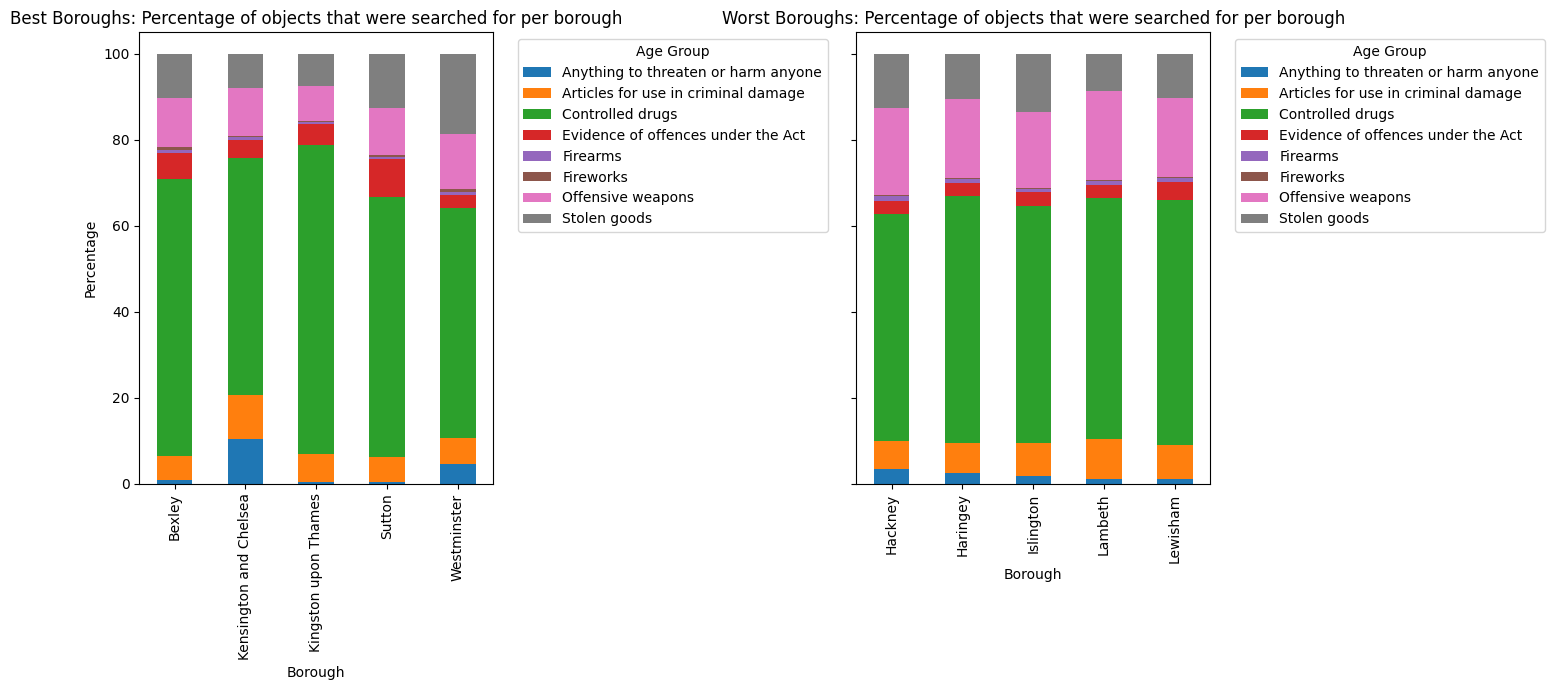

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter DataFrame for best and worst boroughs
df_best = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(best_boroughs)]
df_worst = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(worst_boroughs)]

# Create pivot tables for the stacked bar charts
pivot_best = df_best.pivot(index='Borough', columns='Object of Search', values='Percentage')
pivot_worst = df_worst.pivot(index='Borough', columns='Object of Search', values='Percentage')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# Plot the best boroughs
pivot_best.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Best Boroughs: Percentage of objects that were searched for per borough')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot the worst boroughs
pivot_worst.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Worst Boroughs: Percentage of objects that were searched for per borough')
axes[1].set_xlabel('Borough')

# Set the legend
axes[1].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plots
plt.show()

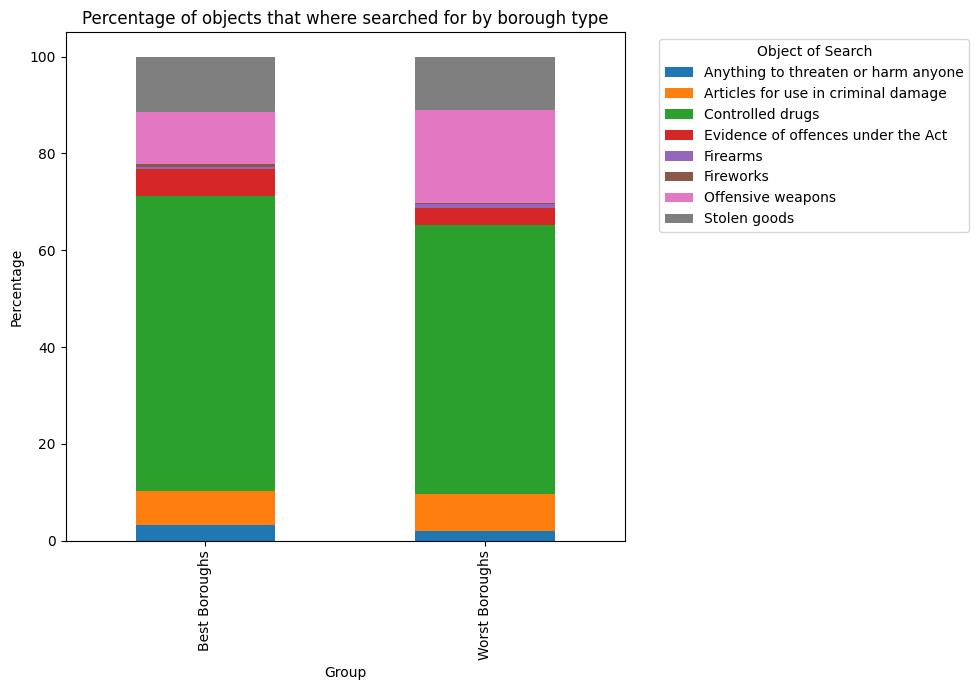

In [9]:
# Filter DataFrame for best and worst boroughs
df_best = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(best_boroughs)]
df_worst = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(worst_boroughs)]

# Create pivot tables for the stacked bar charts
pivot_best = df_best.pivot_table(index='Object of Search', values='Percentage', aggfunc='mean').reset_index()
pivot_worst = df_worst.pivot_table(index='Object of Search', values='Percentage', aggfunc='mean').reset_index()

# Combine the averages into a single DataFrame
pivot_best['Group'] = 'Best Boroughs'
pivot_worst['Group'] = 'Worst Boroughs'
combined_df = pd.concat([pivot_best, pivot_worst])

# Create a pivot table for plotting
plot_df = combined_df.pivot(index='Group', columns='Object of Search', values='Percentage')

# Plot the stacked bar chart
plot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Percentage of objects that where searched for by borough type')
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.legend(title='Object of Search', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
combined_df.to_csv('presentation_dataframes/sas_oos.csv', index=False)

In [11]:
sas_best = len(df_sas_best)
print(sas_best)

sas_worst = len(df_sas_worst)
print(sas_worst)

193197
256905


In [12]:
df_sas_best

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough
1,Person search,2020-01-01 00:01:00+00:00,0.0,NaN,51.509232,-0.117576,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Fireworks,Arrest,NaN,NaN,Westminster
2,Person search,2020-01-01 00:15:00+00:00,0.0,NaN,51.493239,-0.127411,Male,18-24,Asian/Asian British - Chinese,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Westminster
3,Person search,2020-01-01 00:15:00+00:00,0.0,NaN,51.511595,-0.135464,Male,18-24,Other ethnic group - Not stated,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Westminster
4,Person search,2020-01-01 00:16:00+00:00,0.0,NaN,51.400337,-0.271421,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Kingston upon Thames
5,Person search,2020-01-01 00:20:00+00:00,0.0,NaN,51.491291,-0.125979,Male,18-24,Other ethnic group - Not stated,White,Criminal Justice and Public Order Act 1994 (se...,Anything to threaten or harm anyone,A no further action disposal,NaN,NaN,Westminster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450093,Person search,2018-12-31 23:02:00+00:00,0.0,NaN,51.358155,-0.171462,Male,10-17,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,NaN,NaN,Sutton
450094,Person search,2018-12-31 23:19:00+00:00,0.0,NaN,51.508335,-0.154533,Male,18-24,Other ethnic group - Any other ethnic group,Other,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Westminster
450096,Person search,2018-12-31 23:30:00+00:00,0.0,NaN,51.511096,-0.122226,Male,over 34,Other ethnic group - Not stated,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Westminster
450097,Person and Vehicle search,2018-12-31 23:40:00+00:00,0.0,NaN,51.512175,-0.141998,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,NaN,NaN,Westminster


In [13]:
df_sas_best_age_range = df_sas_best.groupby(['Borough', 'Age range']).size().reset_index(name='Count')
df_sas_worst_age_range = df_sas_worst.groupby(['Borough', 'Age range']).size().reset_index(name='Count')
df_sas_age_range_combined = pd.concat([df_sas_best_age_range, df_sas_worst_age_range])

df_sas_age_range_combined

,Borough,Age range,Count
0,Bexley,10-17,4878
1,Bexley,18-24,6481
2,Bexley,25-34,3536
3,Bexley,over 34,2572
4,Bexley,under 10,7
5,Kensington and Chelsea,10-17,6280
6,Kensington and Chelsea,18-24,14024
7,Kensington and Chelsea,25-34,8879
8,Kensington and Chelsea,over 34,6794
9,Kensington and Chelsea,under 10,9


In [14]:
df_sas_age_range_total = df_sas_age_range_combined.groupby('Borough').sum().reset_index()
df_sas_age_range_total = df_sas_age_range_total[['Borough', 'Count']]
df_sas_age_range_total

,Borough,Count
0,Bexley,17474
1,Hackney,43171
2,Haringey,44693
3,Islington,36869
4,Kensington and Chelsea,35986
5,Kingston upon Thames,16691
6,Lambeth,69419
7,Lewisham,37095
8,Sutton,13878
9,Westminster,85492


In [15]:
df_sas_age_range_final = pd.merge(df_sas_age_range_combined, df_sas_age_range_total, on='Borough')
df_sas_age_range_final = df_sas_age_range_final[['Borough', 'Age range', 'Count_x', "Count_y"]]
df_sas_age_range_final.columns = ['Borough', 'Age range', 'Count', 'Total in Borough']
df_sas_age_range_final

,Borough,Age range,Count,Total in Borough
0,Bexley,10-17,4878,17474
1,Bexley,18-24,6481,17474
2,Bexley,25-34,3536,17474
3,Bexley,over 34,2572,17474
4,Bexley,under 10,7,17474
5,Kensington and Chelsea,10-17,6280,35986
6,Kensington and Chelsea,18-24,14024,35986
7,Kensington and Chelsea,25-34,8879,35986
8,Kensington and Chelsea,over 34,6794,35986
9,Kensington and Chelsea,under 10,9,35986


In [16]:
df_sas_age_range_final['Percentage'] = df_sas_age_range_final['Count'] / df_sas_age_range_final['Total in Borough'] * 100
df_sas_age_range_final

,Borough,Age range,Count,Total in Borough,Percentage
0,Bexley,10-17,4878,17474,27.915761
1,Bexley,18-24,6481,17474,37.089390
2,Bexley,25-34,3536,17474,20.235779
3,Bexley,over 34,2572,17474,14.719011
4,Bexley,under 10,7,17474,0.040060
5,Kensington and Chelsea,10-17,6280,35986,17.451231
6,Kensington and Chelsea,18-24,14024,35986,38.970711
7,Kensington and Chelsea,25-34,8879,35986,24.673484
8,Kensington and Chelsea,over 34,6794,35986,18.879564
9,Kensington and Chelsea,under 10,9,35986,0.025010


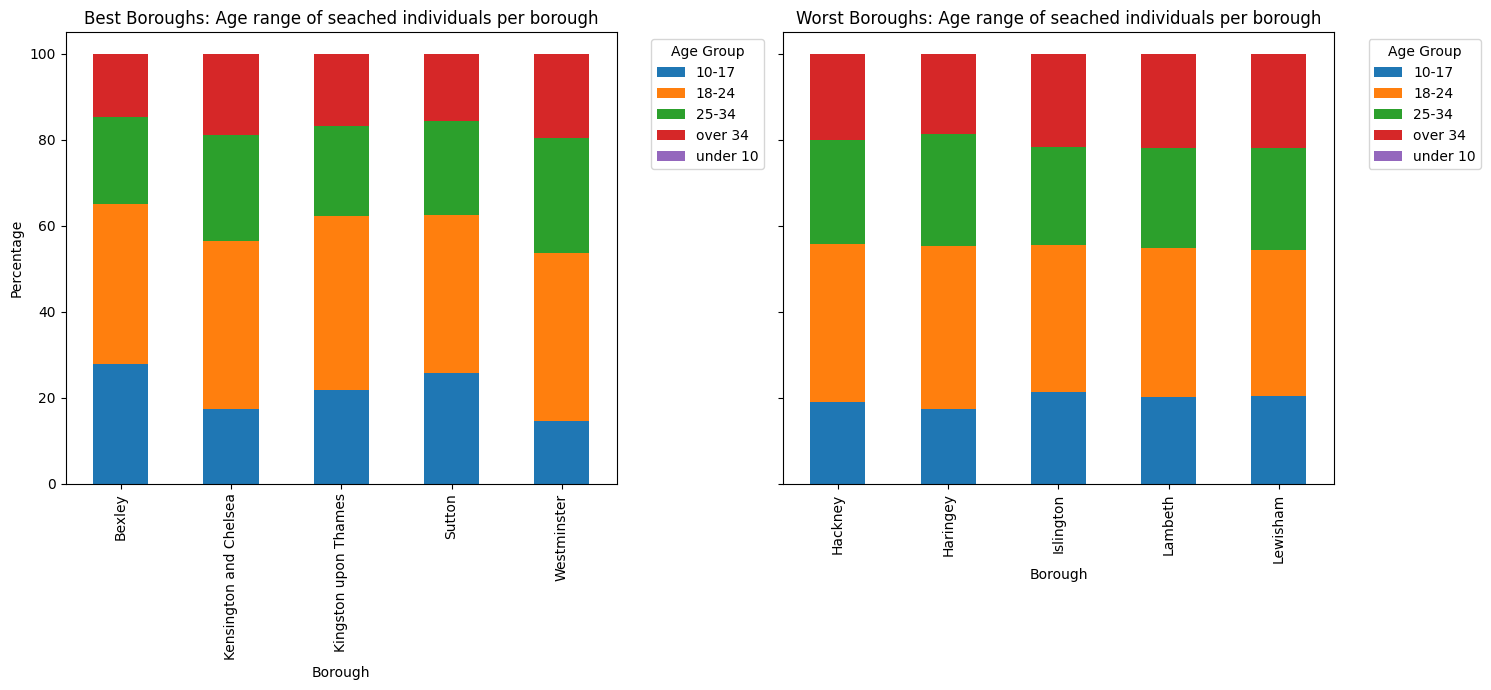

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter DataFrame for best and worst boroughs
df_best = df_sas_age_range_final[df_sas_age_range_final['Borough'].isin(best_boroughs)]
df_worst = df_sas_age_range_final[df_sas_age_range_final['Borough'].isin(worst_boroughs)]

# Create pivot tables for the stacked bar charts
pivot_best = df_best.pivot(index='Borough', columns='Age range', values='Percentage')
pivot_worst = df_worst.pivot(index='Borough', columns='Age range', values='Percentage')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# Plot the best boroughs
pivot_best.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Best Boroughs: Age range of seached individuals per borough')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot the worst boroughs
pivot_worst.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Worst Boroughs: Age range of seached individuals per borough')
axes[1].set_xlabel('Borough')

# Set the legend
axes[1].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plots
plt.show()

In [18]:
df_sas_age_range_total_best = df_sas_age_range_total[df_sas_age_range_total['Borough'].isin(best_boroughs)]
sum_best = df_sas_age_range_total_best['Count'].sum()
print(sum_best)

df_sas_age_range_total_worst = df_sas_age_range_total[df_sas_age_range_total['Borough'].isin(worst_boroughs)]
sum_worst = df_sas_age_range_total_worst['Count'].sum()
print(sum_worst)

169521
231247


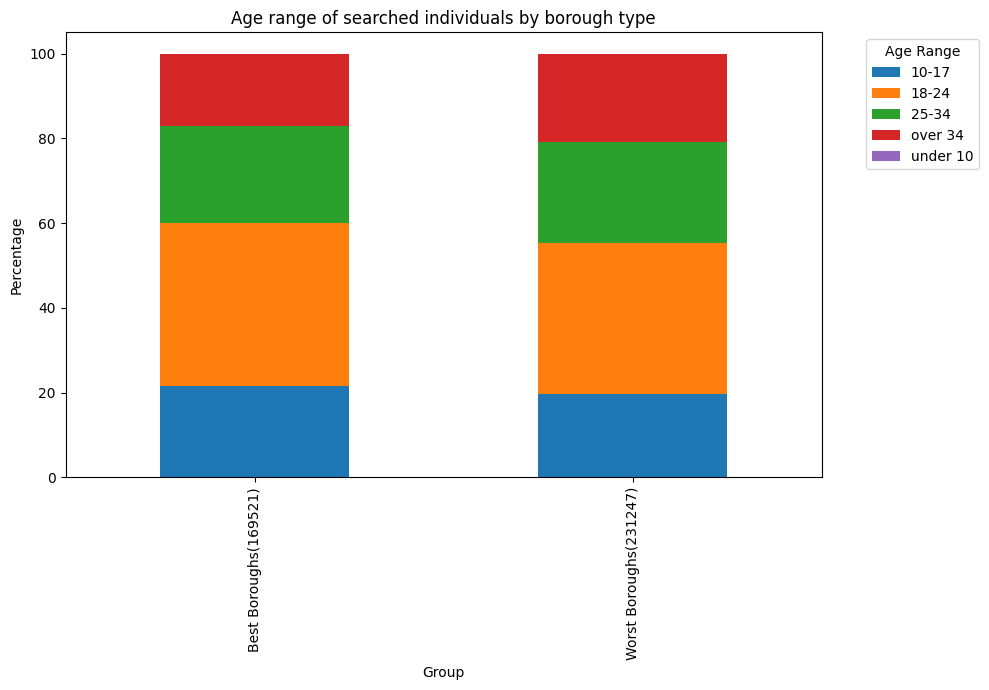

In [19]:
# Filter DataFrame for best and worst boroughs
df_best = df_sas_age_range_final[df_sas_age_range_final['Borough'].isin(best_boroughs)]
df_worst = df_sas_age_range_final[df_sas_age_range_final['Borough'].isin(worst_boroughs)]

# Create pivot tables for the stacked bar charts
pivot_best = df_best.pivot_table(index='Age range', values='Percentage', aggfunc='mean').reset_index()
pivot_worst = df_worst.pivot_table(index='Age range', values='Percentage', aggfunc='mean').reset_index()

# Combine the averages into a single DataFrame
pivot_best['Group'] = 'Best Boroughs' + f'({sum_best})'
pivot_worst['Group'] = 'Worst Boroughs' + f'({sum_worst})'
combined_df = pd.concat([pivot_best, pivot_worst])

# Create a pivot table for plotting
plot_df = combined_df.pivot(index='Group', columns='Age range', values='Percentage')

# Plot the stacked bar chart
plot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Age range of searched individuals by borough type')
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.legend(title='Age Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
combined_df.to_csv('presentation_dataframes/age_sas.csv')

In [21]:
df_sas

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough
0,Person search,2020-01-01 00:00:00+00:00,0.0,NaN,51.546371,-0.076007,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Hackney
1,Person search,2020-01-01 00:01:00+00:00,0.0,NaN,51.509232,-0.117576,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Fireworks,Arrest,NaN,NaN,Westminster
2,Person search,2020-01-01 00:15:00+00:00,0.0,NaN,51.493239,-0.127411,Male,18-24,Asian/Asian British - Chinese,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Westminster
3,Person search,2020-01-01 00:15:00+00:00,0.0,NaN,51.511595,-0.135464,Male,18-24,Other ethnic group - Not stated,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Westminster
4,Person search,2020-01-01 00:16:00+00:00,0.0,NaN,51.400337,-0.271421,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Kingston upon Thames
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450097,Person and Vehicle search,2018-12-31 23:40:00+00:00,0.0,NaN,51.512175,-0.141998,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,NaN,NaN,Westminster
450098,Person search,2018-12-31 23:45:00+00:00,0.0,NaN,51.513833,-0.134292,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Westminster
450099,Person search,2018-12-31 23:50:00+00:00,0.0,NaN,51.522388,-0.086459,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Islington
450100,Person search,2018-12-31 23:50:00+00:00,0.0,NaN,51.522388,-0.086459,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Islington


In [22]:
df_sas_10_17 = df_sas[df_sas['Age range'] == '10-17']
df_sas_10_17

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough
6,Person search,2020-01-01 00:30:00+00:00,0.0,NaN,51.494364,-0.121300,Male,10-17,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Fireworks,A no further action disposal,NaN,NaN,Lambeth
7,Person search,2020-01-01 00:39:00+00:00,0.0,NaN,51.426785,-0.112393,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN,Lambeth
13,Person search,2020-01-01 00:44:00+00:00,0.0,NaN,51.426785,-0.112393,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN,Lambeth
16,Person search,2020-01-01 00:47:00+00:00,0.0,NaN,51.426785,-0.112393,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN,Lambeth
23,Person search,2020-01-01 01:15:00+00:00,0.0,NaN,51.511595,-0.135464,Male,10-17,Other ethnic group - Not stated,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN,Westminster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450068,Person search,2018-12-31 22:10:00+00:00,0.0,NaN,51.494364,-0.121300,Male,10-17,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Lambeth
450069,Person search,2018-12-31 22:15:00+00:00,0.0,NaN,51.494364,-0.121300,Male,10-17,Black/African/Caribbean/Black British - Caribbean,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Lambeth
450072,Person search,2018-12-31 22:15:00+00:00,0.0,NaN,51.511595,-0.135464,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Caution (simple or conditional),NaN,NaN,Westminster
450086,Person search,2018-12-31 22:40:00+00:00,0.0,NaN,51.485939,-0.141682,Male,10-17,Other ethnic group - Not stated,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN,Westminster


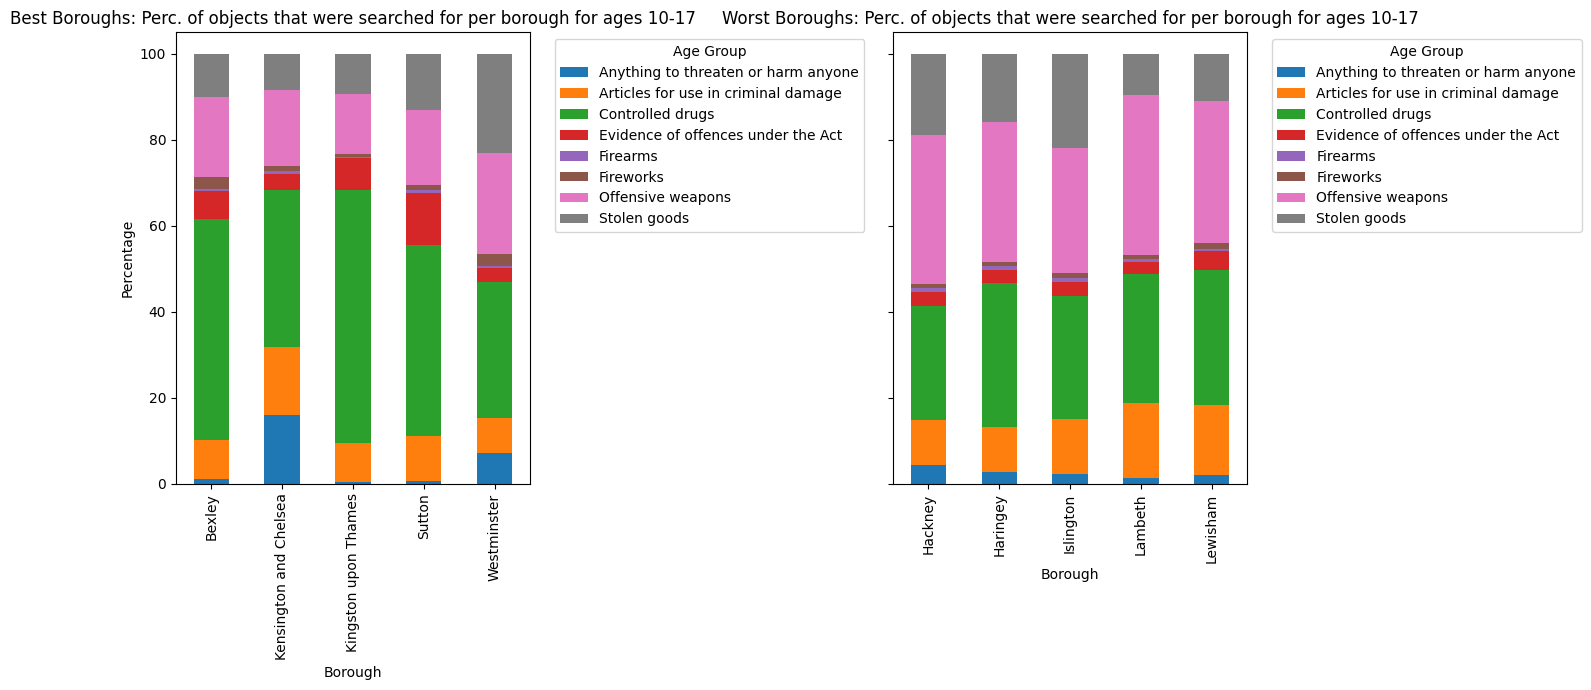

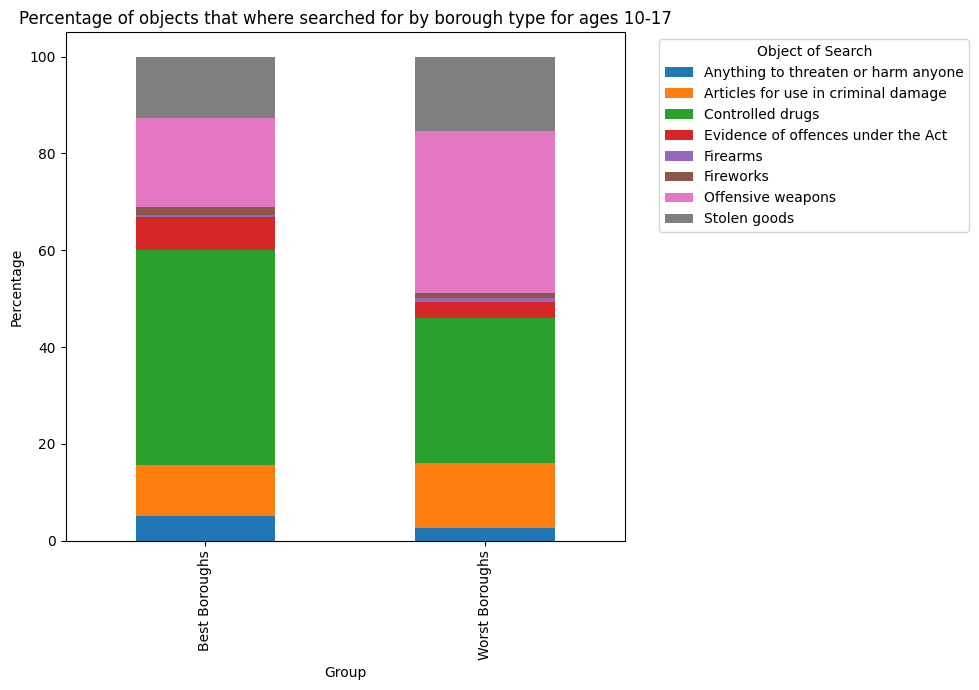

In [23]:
df_sas_10_17_best = df_sas_10_17[df_sas_10_17['Borough'].isin(best_boroughs)]
df_sas_10_17_worst = df_sas_10_17[df_sas_10_17['Borough'].isin(worst_boroughs)]

df_sas_best_object_of_search = df_sas_10_17_best.groupby(['Borough', 'Object of search']).size().reset_index(name='Count')
df_sas_worst_object_of_search = df_sas_10_17_worst.groupby(['Borough', 'Object of search']).size().reset_index(name='Count')
df_sas_object_of_search_combined = pd.concat([df_sas_best_object_of_search, df_sas_worst_object_of_search])

df_sas_object_of_search_combined
df_sas_object_of_search_total = df_sas_object_of_search_combined.groupby('Borough').sum().reset_index()
df_sas_object_of_search_total = df_sas_object_of_search_total[['Borough', 'Count']]
df_sas_object_of_search_total
df_sas_object_of_search_final = pd.merge(df_sas_object_of_search_combined, df_sas_object_of_search_total, on='Borough')
df_sas_object_of_search_final = df_sas_object_of_search_final[['Borough', 'Object of search', 'Count_x', "Count_y"]]
df_sas_object_of_search_final.columns = ['Borough', 'Object of Search', 'Count', 'Total in Borough']
df_sas_object_of_search_final
df_sas_object_of_search_final['Percentage'] = df_sas_object_of_search_final['Count'] / df_sas_object_of_search_final['Total in Borough'] * 100
df_sas_object_of_search_final
import pandas as pd
import matplotlib.pyplot as plt

# Filter DataFrame for best and worst boroughs
df_best = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(best_boroughs)]
df_worst = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(worst_boroughs)]

# Create pivot tables for the stacked bar charts
pivot_best = df_best.pivot(index='Borough', columns='Object of Search', values='Percentage')
pivot_worst = df_worst.pivot(index='Borough', columns='Object of Search', values='Percentage')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# Plot the best boroughs
pivot_best.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Best Boroughs: Perc. of objects that were searched for per borough for ages 10-17')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot the worst boroughs
pivot_worst.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Worst Boroughs: Perc. of objects that were searched for per borough for ages 10-17')
axes[1].set_xlabel('Borough')

# Set the legend
axes[1].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plots
plt.show()
# Filter DataFrame for best and worst boroughs
df_best = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(best_boroughs)]
df_worst = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(worst_boroughs)]

# Create pivot tables for the stacked bar charts
pivot_best = df_best.pivot_table(index='Object of Search', values='Percentage', aggfunc='mean').reset_index()
pivot_worst = df_worst.pivot_table(index='Object of Search', values='Percentage', aggfunc='mean').reset_index()

# Combine the averages into a single DataFrame
pivot_best['Group'] = 'Best Boroughs'
pivot_worst['Group'] = 'Worst Boroughs'
combined_df = pd.concat([pivot_best, pivot_worst])

# Create a pivot table for plotting
plot_df = combined_df.pivot(index='Group', columns='Object of Search', values='Percentage')

# Plot the stacked bar chart
plot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Percentage of objects that where searched for by borough type for ages 10-17')
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.legend(title='Object of Search', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
df_sas

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough
0,Person search,2020-01-01 00:00:00+00:00,0.0,NaN,51.546371,-0.076007,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Hackney
1,Person search,2020-01-01 00:01:00+00:00,0.0,NaN,51.509232,-0.117576,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Fireworks,Arrest,NaN,NaN,Westminster
2,Person search,2020-01-01 00:15:00+00:00,0.0,NaN,51.493239,-0.127411,Male,18-24,Asian/Asian British - Chinese,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Westminster
3,Person search,2020-01-01 00:15:00+00:00,0.0,NaN,51.511595,-0.135464,Male,18-24,Other ethnic group - Not stated,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Westminster
4,Person search,2020-01-01 00:16:00+00:00,0.0,NaN,51.400337,-0.271421,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Kingston upon Thames
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450097,Person and Vehicle search,2018-12-31 23:40:00+00:00,0.0,NaN,51.512175,-0.141998,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,NaN,NaN,Westminster
450098,Person search,2018-12-31 23:45:00+00:00,0.0,NaN,51.513833,-0.134292,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Westminster
450099,Person search,2018-12-31 23:50:00+00:00,0.0,NaN,51.522388,-0.086459,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Islington
450100,Person search,2018-12-31 23:50:00+00:00,0.0,NaN,51.522388,-0.086459,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Islington


In [26]:
# df_sas_best = df_sas[df_sas['Borough'].isin(best_boroughs)]
# df_sas_worst = df_sas[df_sas['Borough'].isin(worst_boroughs)]

# df_sas_best_object_of_search = df_sas_best.groupby(['Borough', 'Officer-defined ethnicity']).size().reset_index(name='Count')
# df_sas_worst_object_of_search = df_sas_worst.groupby(['Borough', 'Officer-defined ethnicity']).size().reset_index(name='Count')
# df_sas_object_of_search_combined = pd.concat([df_sas_best_object_of_search, df_sas_worst_object_of_search])

# df_sas_object_of_search_combined
# df_sas_object_of_search_total = df_sas_object_of_search_combined.groupby('Borough').sum().reset_index()
# df_sas_object_of_search_total = df_sas_object_of_search_total[['Borough', 'Count']]
# df_sas_object_of_search_total
# df_sas_object_of_search_final = pd.merge(df_sas_object_of_search_combined, df_sas_object_of_search_total, on='Borough')
# df_sas_object_of_search_final = df_sas_object_of_search_final[['Borough', 'Object of search', 'Count_x', "Count_y"]]
# df_sas_object_of_search_final.columns = ['Borough', 'Object of Search', 'Count', 'Total in Borough']
# df_sas_object_of_search_final
# df_sas_object_of_search_final['Percentage'] = df_sas_object_of_search_final['Count'] / df_sas_object_of_search_final['Total in Borough'] * 100
# df_sas_object_of_search_final
# import pandas as pd
# import matplotlib.pyplot as plt

# # Filter DataFrame for best and worst boroughs
# df_best = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(best_boroughs)]
# df_worst = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(worst_boroughs)]

# # Create pivot tables for the stacked bar charts
# pivot_best = df_best.pivot(index='Borough', columns='Object of Search', values='Percentage')
# pivot_worst = df_worst.pivot(index='Borough', columns='Object of Search', values='Percentage')

# # Create subplots
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# # Plot the best boroughs
# pivot_best.plot(kind='bar', stacked=True, ax=axes[0])
# axes[0].set_title('Best Boroughs: Perc. of objects that were searched for per borough for ages 10-17')
# axes[0].set_xlabel('Borough')
# axes[0].set_ylabel('Percentage')
# axes[0].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Plot the worst boroughs
# pivot_worst.plot(kind='bar', stacked=True, ax=axes[1])
# axes[1].set_title('Worst Boroughs: Perc. of objects that were searched for per borough for ages 10-17')
# axes[1].set_xlabel('Borough')

# # Set the legend
# axes[1].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Adjust layout to make room for the legend
# plt.tight_layout()

# # Display the plots
# plt.show()
# # Filter DataFrame for best and worst boroughs
# df_best = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(best_boroughs)]
# df_worst = df_sas_object_of_search_final[df_sas_object_of_search_final['Borough'].isin(worst_boroughs)]

# # Create pivot tables for the stacked bar charts
# pivot_best = df_best.pivot_table(index='Object of Search', values='Percentage', aggfunc='mean').reset_index()
# pivot_worst = df_worst.pivot_table(index='Object of Search', values='Percentage', aggfunc='mean').reset_index()

# # Combine the averages into a single DataFrame
# pivot_best['Group'] = 'Best Boroughs'
# pivot_worst['Group'] = 'Worst Boroughs'
# combined_df = pd.concat([pivot_best, pivot_worst])

# # Create a pivot table for plotting
# plot_df = combined_df.pivot(index='Group', columns='Object of Search', values='Percentage')

# # Plot the stacked bar chart
# plot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

# plt.title('Percentage of objects that where searched for by borough type for ages 10-17')
# plt.xlabel('Group')
# plt.ylabel('Percentage')
# plt.legend(title='Object of Search', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [27]:
df_sas_best_10_17 = df_sas_best[df_sas_best['Age range'] == '10-17']
df_sas_worst_10_17 = df_sas_worst[df_sas_worst['Age range'] == '10-17']

print(len(df_sas_best_10_17))
print(len(df_sas_worst_10_17))

30866
45378


In [28]:
df_best

,Borough,Object of Search,Count,Total in Borough,Percentage
0,Bexley,Anything to threaten or harm anyone,57,4856,1.173806
1,Bexley,Articles for use in criminal damage,442,4856,9.102142
2,Bexley,Controlled drugs,2491,4856,51.297364
3,Bexley,Evidence of offences under the Act,316,4856,6.507414
4,Bexley,Firearms,22,4856,0.453048
5,Bexley,Fireworks,133,4856,2.738880
6,Bexley,Offensive weapons,911,4856,18.760297
7,Bexley,Stolen goods,484,4856,9.967051
8,Kensington and Chelsea,Anything to threaten or harm anyone,1002,6263,15.998723
9,Kensington and Chelsea,Articles for use in criminal damage,990,6263,15.807121
